## 3. Calidad de un vino

### Nota: Se hizo un análisis de los datos normalizados y sin normalizar. Los resultados de este archivo son con los datos normalizados. Para ver los resultados sin normalización, ver este archivo con el commit "Sin estandarizar" https://github.com/archidemus/T3ML/blob/24315a6c3ce92eb54c1085a59d33bf236cad48e4/P3.ipynb

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import sparse_categorical_crossentropy
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.svm import SVC as SVM
from sklearn.decomposition import PCA
import seaborn as sn

### (a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [3]:
df_red = pd.read_csv("dataset3/winequality-red.csv",sep=";")
df_red['type'] = 0
df_white = pd.read_csv("dataset3/winequality-white.csv",sep=";")
df_white['type'] = 1
df = pd.concat([df_red,df_white], axis=0)
df.info()
pd.value_counts(df['quality'].values, sort=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


4     216
8     193
5    2138
9       5
6    2836
3      30
7    1079
dtype: int64

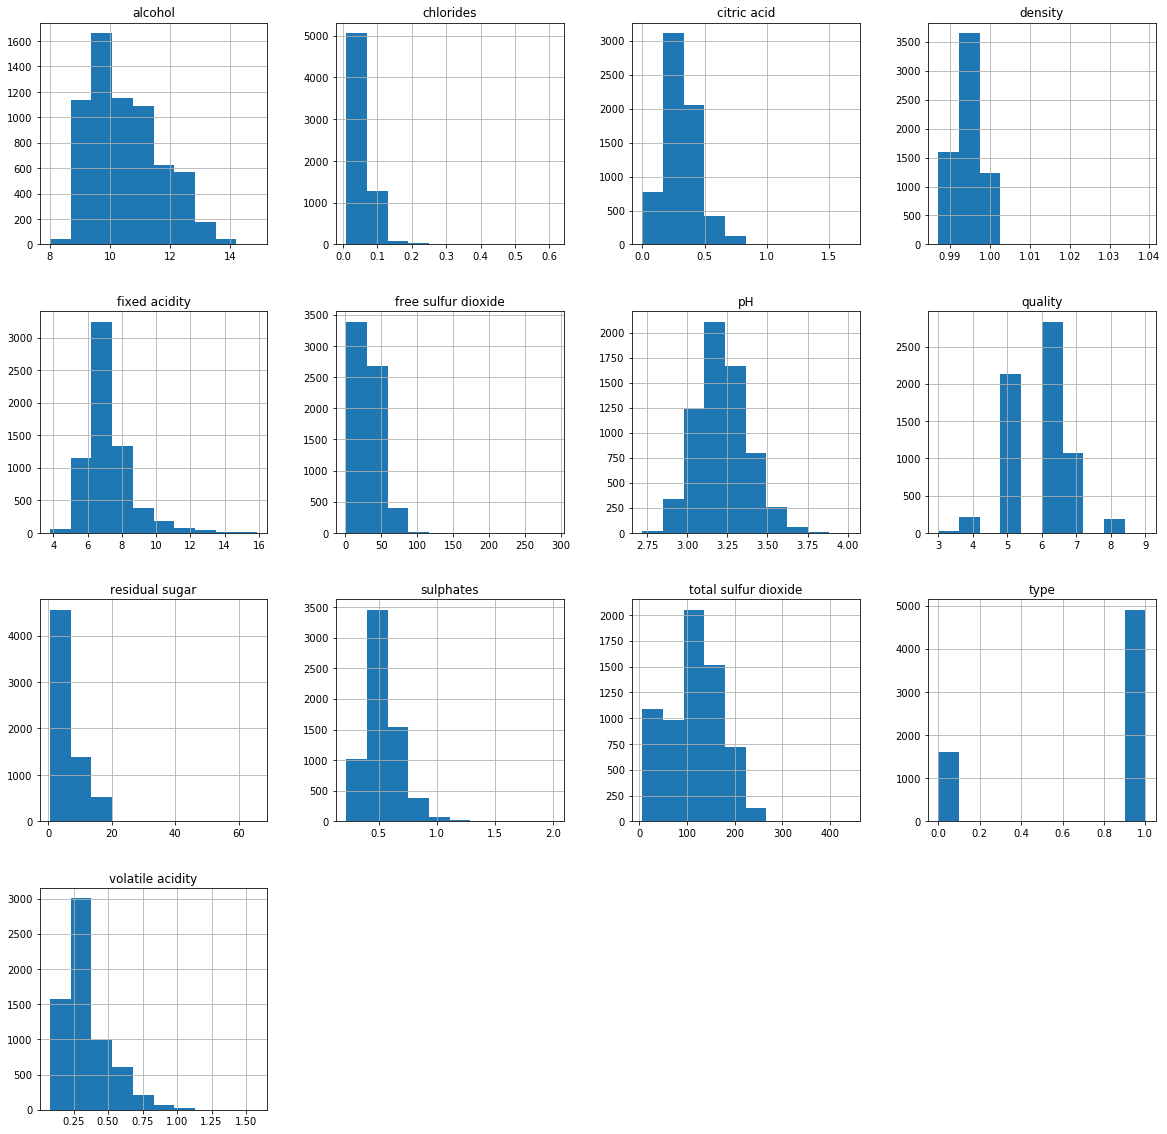

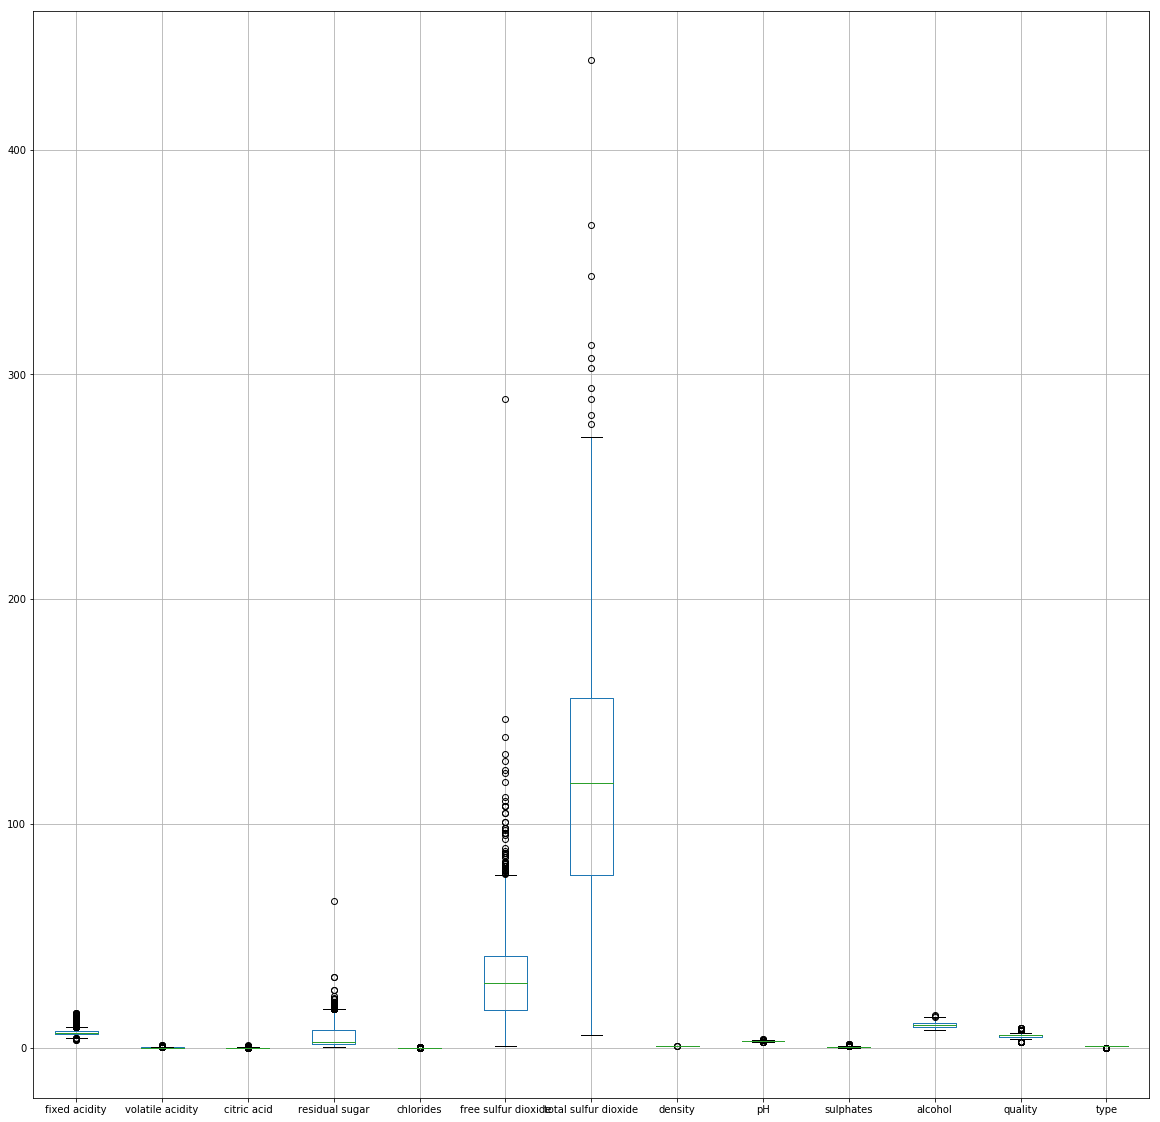

In [27]:
df.hist(figsize=(20,20))
plt.show()
df.boxplot(figsize=(20,20))
plt.show()

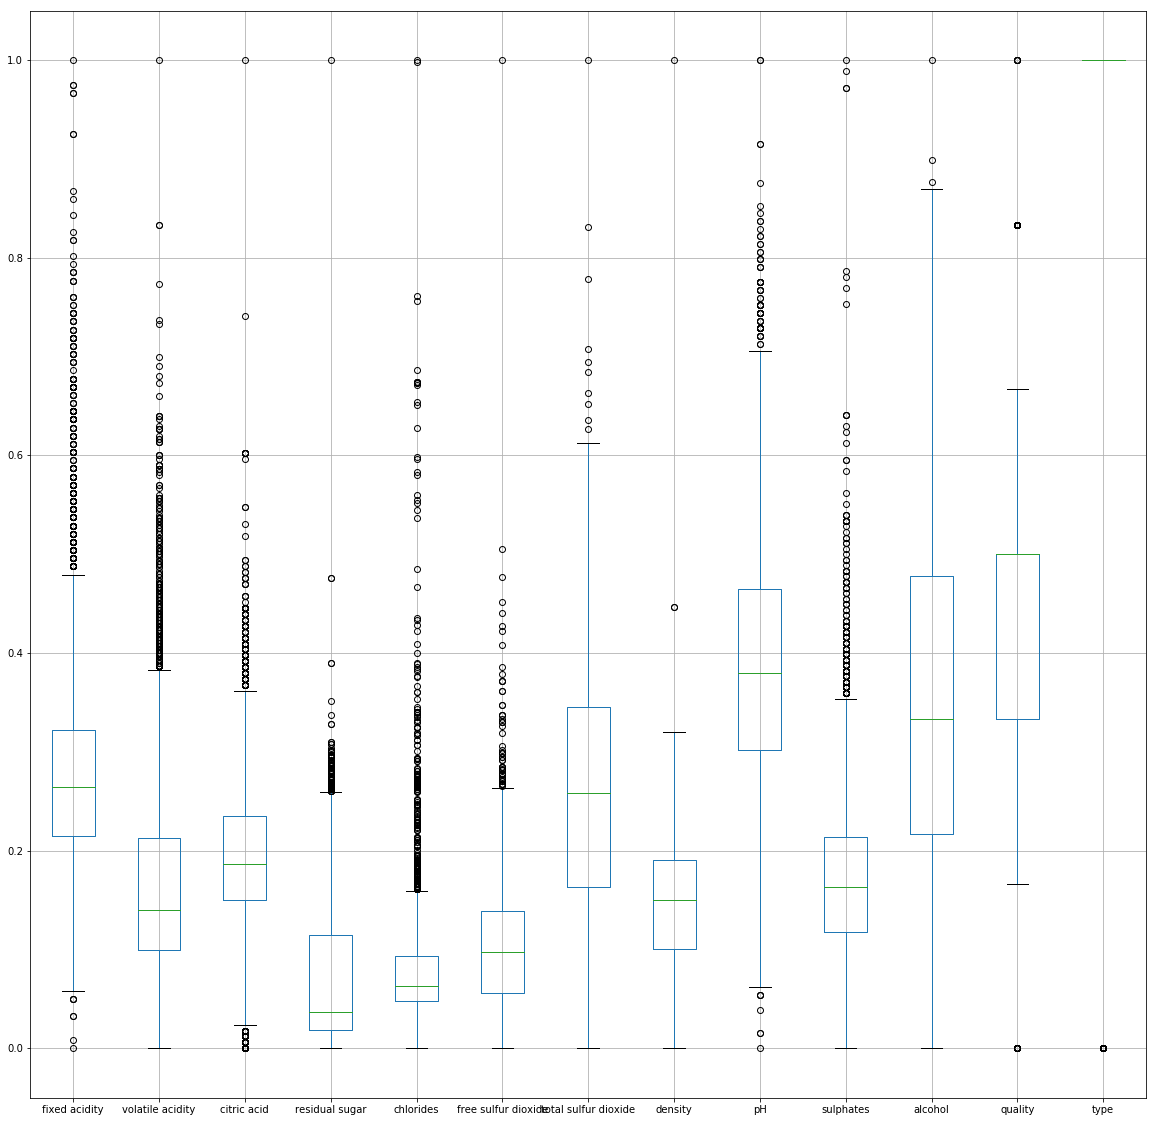

In [4]:
df_columns = df.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_scaled = pd.DataFrame(np_scaled)
df_scaled.columns = df_columns
df_scaled.boxplot(figsize=(20,20))
plt.show()

In [44]:
df_scaled.var()

fixed acidity           0.011480
volatile acidity        0.012047
citric acid             0.007663
residual sugar          0.005325
chlorides               0.003387
free sulfur dioxide     0.003798
total sulfur dioxide    0.016961
density                 0.003342
pH                      0.015535
sulphates               0.006989
alcohol                 0.029879
quality                 0.021183
type                    0.185570
good_quality            0.232330
dtype: float64

In [46]:
df_scaled.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,good_quality
fixed acidity,0.011480,0.002575,0.003043,-0.000876,0.001859,-0.001867,-0.004592,0.002843,-0.003375,0.002683,-0.001768,-0.001197,-0.022465,-0.003478
volatile acidity,0.002575,0.012047,-0.003632,-0.001570,0.002409,-0.002385,-0.005925,0.001721,0.003577,0.002074,-0.000714,-0.004244,-0.030876,-0.014128
citric acid,0.003043,-0.003632,0.007663,0.000910,0.000199,0.000718,0.002226,0.000487,-0.003599,0.000411,-0.000159,0.001090,0.007067,0.003196
residual sugar,-0.000876,-0.001570,0.000910,0.005325,-0.000548,0.001812,0.004709,0.002331,-0.002431,-0.001134,-0.004534,-0.000393,0.010965,-0.001143
chlorides,0.001859,0.002409,0.000199,-0.000548,0.003387,-0.000700,-0.002119,0.001220,0.000324,0.001925,-0.002584,-0.001700,-0.012852,-0.005103
free sulfur dioxide,-0.001867,-0.002385,0.000718,0.001812,-0.000700,0.003798,0.005786,0.000092,-0.001120,-0.000971,-0.001916,0.000497,0.012522,0.001331
total sulfur dioxide,-0.004592,-0.005925,0.002226,0.004709,-0.002119,0.005786,0.016961,0.000244,-0.003870,-0.003002,-0.005982,-0.000784,0.039292,-0.002987
density,0.002843,0.001721,0.000487,0.002331,0.001220,0.000092,0.000244,0.003342,0.000084,0.001254,-0.006863,-0.002573,-0.009729,-0.007492
pH,-0.003375,0.003577,-0.003599,-0.002431,0.000324,-0.001120,-0.003870,0.000084,0.015535,0.002002,0.002612,0.000354,-0.017672,0.001132
sulphates,0.002683,0.002074,0.000411,-0.001134,0.001925,-0.000971,-0.003002,0.001254,0.002002,0.006989,-0.000044,0.000468,-0.017546,0.001443


In [8]:
df_scaled.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


#### Observación
Se agragó la columna "type" donde 0 es tinto y 1 es blanco. Se observa que el dataset no contiene valores de calidad menores que 3 y que la mayoría se ubica entre 5 y 7. Además existe una gran diferencia entre una categoría y otra, pudiendo afectar el proceso de aprendizaje.

Se ve que los datos no se distrubuyen de forma normal. Una vez realizado el escalamiento se observa una gran cantidad de outliers que pasaban desapercibidos en el boxplot del conjunto original, dando cuenta de que estos pueden influir en las máquinas que toman como peso los datos alejados de la frontera.

Además se observa una gran correlación entre los atributos sulfuros y una gran dependencia de la cantidad de alcohol en la calidad del vino.

### (b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas (25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

In [29]:
#Create sets
df_scaled['good_quality'] = [1.0 if q>=0.5 else 0.0 for q in df_scaled.quality]
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
df_no_quality = df.drop('quality',1)
dfs_no_quality = df_scaled.drop('quality',1)

print(pd.value_counts(df_no_quality['good_quality'].values, sort=False))
print(pd.value_counts(dfs_no_quality['good_quality'].values, sort=False))

y = df_no_quality.pop('good_quality')
X = df_no_quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.266, random_state=42)

y = dfs_no_quality.pop('good_quality')
X = dfs_no_quality
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(Xs_train, ys_train, test_size=0.266, random_state=42)

0    2384
1    4113
dtype: int64
0.0    2384
1.0    4113
dtype: int64


#### Observación
Cabe destacar la diferencia existente entre la categoría "buena calidad", 1, y mala calidad, 0. Lo cual puede afectar posteriormente la calidad de la máquina. Se investigaron los atributos del vino aprendiendo que gran parte de la calidad depende del ph y de la cantidad de alcohol. Esto solo se comprobó en el caso del alcohol, sin embargo no en el del Ph. 

Se crearon conjuntos escalados y no escalados para ver su influencia en el resultado final, además de crear conjuntos de validación para la toma de desiciones en parámaetros de cada máquina.

### (c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera. Recuerde que las decisiones no pueden ser basadas mirando el conjunto de pruebas, debido al desbalanceo que se produce en las dos clases mida la métrica F1-score [5] sobre el conjunto de entrenamiento y de pruebas.

In [30]:
# Función que escoge parámetros óptimos

rs=20
md=50
mss=50
df1=0

#for j in range(1, md):
#    for k in range(2, mss):
#        tree_c = Tree(criterion = "entropy", random_state = rs, max_depth=j, min_samples_split=k)
#        tree_c.fit(X_train, y_train)
#        f1 = f1_score(y_val, tree_c.predict(X_val))
#        if (f1>df1):
#            df1 = f1
#            print("Entropy %d %d %d %f" % (rs, j, k, df1))
#        tree_c = Tree(criterion = "gini", random_state = rs, max_depth=j, min_samples_split=k)
#        tree_c.fit(X_train, y_train)
#        f1 = f1_score(y_val, tree_c.predict(X_val))
#        if (f1>df1):
#            df1 = f1
#            print("Gini %d %d %d %f" % (rs, j, k, df1))

In [31]:
tree_c = Tree(criterion = "entropy", random_state = rs, max_depth=15, min_samples_split=3)
tree_c.fit(X_train, y_train)
print(classification_report(y_train, tree_c.predict(X_train)))

tree_c = Tree(criterion = "entropy", random_state = rs, max_depth=15, min_samples_split=3)
tree_c.fit(X_train, y_train)
print(classification_report(y_test, tree_c.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96       985
        1.0       0.99      0.96      0.97      1639

avg / total       0.97      0.97      0.97      2624

             precision    recall  f1-score   support

        0.0       0.60      0.71      0.65       584
        1.0       0.82      0.73      0.77      1041

avg / total       0.74      0.72      0.73      1625



#### Respuesta

Se realizó una función que escogió los mejores parámetros basado en el f1Score del conjunto de entrenamiento. A partir de el se llegó a que la profundidad máxima debía ser 15 y que el número mínimo de elementos por corte debía ser 3. Una vez hecho esto, se obtuvo un reporte de clasificación para el conjunto de entrenamiento y el de pruebas.

Se observa que dada la cantidad menor de ejemplos para la clase 0 (baja calidad), su f1Score es menor, mientras que para la clase 1 (alta calidad) esta estadística es mejor. Esto se debe a que hay una mayor cantidad de ejemplos en ese caso.

Se hace patente una gran diferencia entre el conjunto de training y test, dando a entender la existencia de overfitting.

Se realizó el experimento con los datos sin ecalar y con escalamiento. En el primer(resultados obtenidos en una iteración anterior, no visibles en el notebook) caso el f1Score de 1 fue de 0.79, mientras que escalado (el observado arriba). Desde ese punto de vista el escalamiento entorpeció el resultado.

### (d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [32]:
# Función que escoge parámetros óptimos

rs=20
md=50
mss=50
df1=0

#for md in range(1,20):
#    for ne in range(1,100):
#        model = RandomForestClassifier(n_estimators=ne, random_state=rs, max_depth=md, n_jobs=-1)
#        model.fit(X_train, y_train)
#        s = f1_score(y_val, model.predict(X_val))
#        if (s>df1):
#            df1 = s
#            print("RF %d %d %d %f" % (rs, md, ne, df1))

RF 1 20 0.908538
RF 2 20 0.899802
RF 3 20 0.957875
RF 4 20 0.957313
RF 5 20 0.976176
RF 6 20 0.978973
RF 7 20 0.986577
RF 8 20 0.987396
RF 9 20 0.991161
RF 10 20 0.991741
RF 11 20 0.991172
RF 12 20 0.992969
RF 13 20 0.992986
RF 14 20 0.993876
RF 15 20 0.996031
RF 16 20 0.995719
RF 17 20 0.995417
RF 18 20 0.995409
RF 19 20 0.996333
RF 20 20 0.995713
RF 21 20 0.996335
RF 22 20 0.996635
RF 23 20 0.997557
RF 24 20 0.997861
RF 25 20 0.997557
RF 26 20 0.997557
RF 27 20 0.998170
RF 28 20 0.998779
RF 29 20 0.998779
RF 30 20 0.998779
RF 31 20 0.998779
RF 32 20 0.999084
RF 33 20 0.999389
RF 34 20 0.999084
RF 35 20 0.999085
RF 36 20 0.999389
RF 37 20 0.999390
RF 38 20 0.999695
RF 39 20 0.999695
RF 40 20 0.999695
RF 41 20 0.999695
RF 42 20 0.999695
RF 43 20 1.000000
RF 44 20 0.999695
RF 45 20 1.000000
RF 46 20 1.000000
RF 47 20 1.000000
RF 48 20 1.000000
RF 49 20 1.000000


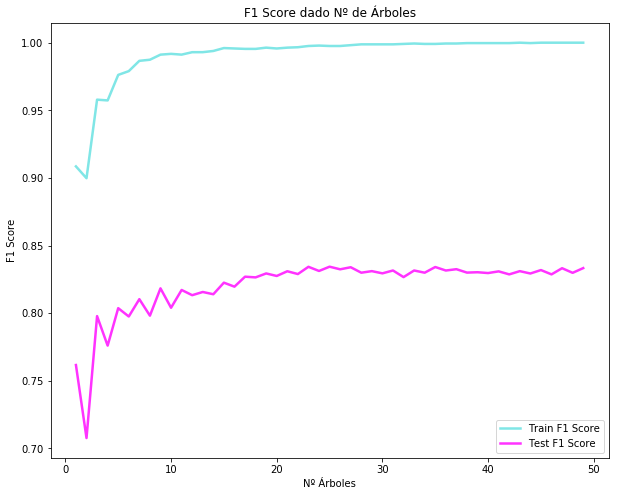

             precision    recall  f1-score   support

        0.0       0.94      0.91      0.92       985
        1.0       0.95      0.96      0.95      1639

avg / total       0.94      0.94      0.94      2624

             precision    recall  f1-score   support

        0.0       0.69      0.69      0.69       584
        1.0       0.83      0.82      0.83      1041

avg / total       0.78      0.78      0.78      1625



In [33]:
scoreTrain = []
scoreTest = []

for ne in range(1,50):
    model = RandomForestClassifier(n_estimators=ne, random_state=15, max_depth=82, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, 20, sTrain))
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,50)), np.array(scoreTrain), lw=2.5, color=(0.5,0.9,0.9), label='Train F1 Score')
plt.plot(np.array(range(1,50)), np.array(scoreTest), lw=2.5, color=(1,0.2,1), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=ne, random_state=18, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

#### Respuesta

Se realizó una función que escogió los mejores parámetros basado en el f1Score del conjunto de entrenamiento. Dados estos parámetros, max_depth = 10, se realizó una ejecucion del modelo variando el número de estimadores.

Se observa un crecimiento sostenible del f1Score en el conjunto de entrenamiento. Esto ocurre de la misma forma en el conjunto de pruebas, con una variación mayor y con un valor menor que en el de entrenamiento. 

Así, se observa que existe overfitting durante toda la ejecución del algoritmo. A través de classification_score, se observa la diferencia entre f1Score de la clase positiva y negativa, donde se mantiene la tendencia de diferencia en la eficiencia entre estas clases por la cantidad distinta de ejemplos disponibles

Comparando escalamiento y no escalamiento, una vez más los datos escalados tuevieron resultados peores que los no escalados.

### (e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de AdaBoost. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

AB 1 1.000000
AB 2 1.000000
AB 3 1.000000
AB 4 1.000000
AB 5 1.000000
AB 6 1.000000
AB 7 1.000000
AB 8 1.000000
AB 9 1.000000
AB 10 1.000000
AB 11 1.000000
AB 12 1.000000
AB 13 1.000000
AB 14 1.000000
AB 15 1.000000
AB 16 1.000000
AB 17 1.000000
AB 18 1.000000
AB 19 1.000000
AB 20 1.000000
AB 21 1.000000
AB 22 1.000000
AB 23 1.000000
AB 24 1.000000
AB 25 1.000000
AB 26 1.000000
AB 27 1.000000
AB 28 1.000000
AB 29 1.000000
AB 30 1.000000
AB 31 1.000000
AB 32 1.000000
AB 33 1.000000
AB 34 1.000000
AB 35 1.000000
AB 36 1.000000
AB 37 1.000000
AB 38 1.000000
AB 39 1.000000
AB 40 1.000000
AB 41 1.000000
AB 42 1.000000
AB 43 1.000000
AB 44 1.000000
AB 45 1.000000
AB 46 1.000000
AB 47 1.000000
AB 48 1.000000
AB 49 1.000000


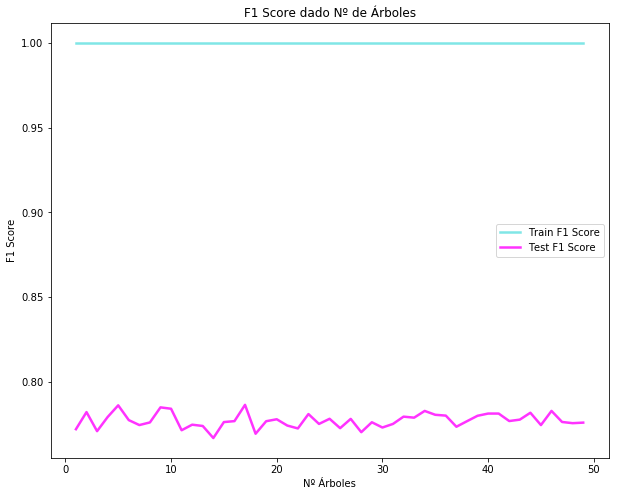

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       985
        1.0       1.00      1.00      1.00      1639

avg / total       1.00      1.00      1.00      2624

             precision    recall  f1-score   support

        0.0       0.65      0.66      0.65       584
        1.0       0.81      0.80      0.80      1041

avg / total       0.75      0.75      0.75      1625



In [34]:
scoreTrain = []
scoreTest = []
for ne in range(1,50):
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=20), n_estimators=ne)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("AB %d %f" % (ne, sTrain))

plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,50)), np.array(scoreTrain), lw=2.5, color=(0.5,0.9,0.9), label='Train F1 Score')
plt.plot(np.array(range(1,50)), np.array(scoreTest), lw=2.5, color=(1,0.2,1), label='Test F1 Score')
plt.legend()
plt.show()

model = AdaBoostClassifier(base_estimator=Tree(max_depth=6), n_estimators=30)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

#### Respuesta

En esta ocasión se mantiene la misma tendencia que en d, sin embargo se notó una diferencia en el valor f1Score logrado, el cual disminuyó respecto al método anterior. Esto significa que usado adaboost el resultado empeoró.

Esto es contraintuitivo, ya que considerando que AdaBoost busca complementar las máquinas que lo conforman. Sin embargo, invesigando la implementación del algoritmo, AdaBoostClassifier implementa AdaBoost-SAMME, el cual le da mas peso a los puntos mal clasificados. De esta forma, lo que puede estar ocurriendo es que los outliers estan siendo sobre representados.

Desde otro punto de vista, se observa que la variación respecto al número de estimadores también es diferente. Aquí el crecimiento es más errático, mientras que usando RandomForest este es más continuo. Esto se manifiesta de forma notoria en el conjunto de pruebas, dando a entender que RandomForest puede ser más confiable que AdaBoost en este caso.

Desde el punto de vista del tiempo de ejecución, AdaBoost en la medida que aumenta la cantidad de estimadores se demora más. Esto se debe a que AdaBoost tiene una ejecución secuencial, mientras que random forest tiene una ejecucion en paralelo.

Finalmente en este caso el f1Score nuevamente fue peor con los datos escalados. Con los datos sin escalar, la clase 1 obtuvo 0.81 mientras que aquí, con los datos normalizados, fue de 0.80. 

### (f) Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).

In [35]:
model= SVM()
model.set_params(C=20,kernel='sigmoid')
model.fit(X_train,y_train)
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.62      0.58      0.60       584
        1.0       0.77      0.80      0.78      1041

avg / total       0.72      0.72      0.72      1625



In [36]:
model= SVM()
model.set_params(C=20,kernel='rbf')
model.fit(X_train,y_train)
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.64      0.59      0.61       584
        1.0       0.78      0.81      0.80      1041

avg / total       0.73      0.73      0.73      1625



#### Respuesta

Se entrenaron SVM's con distintas combinaciones de parámetros para tratar de igualar el desempeño logrado por las máquinas c(Arboles de clasificación), d(RandomForest) y e(AdaBoost). El resultado obtenido siempre fue menor que estas máquinas.

Los resultados obtenidos por AdaBoost y el arbol de clasificación fueron iguales, mientras que RandomForest fue el que tuvo mejores resultados.

El algoritmo de RandomForest implementa muestras bootstrap para cada árbol usado en la ejecución. Como se vio en la parte 1, la separación de las clases no es clara y además existe una gran cantidad de outliers. Dado esto, RandomForest tiene una ventaja en este sentido, ya que el uso de muestra bootstrap ayuda a la eliminación de estos outliers mejorando la predicción.

Por otro lado, el árbol de clasificación no implementa ningún método para luchar contra outliers o para corregir su prediccion en la medida que se ejecuta. Dado lo anterior, este fue el que obtuvo peores resultados junto con la SVM, dando a entender que el método de corrección que implementa AdaBoost tiene influencia en el resultado final.


### (g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Random Forest, impleméntelo sobre alguno de los ensambladores entrenados en d), haga un ranking de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de boost como lo es AdaBoost ?

#### Método

Lo primero es decir que el resultado de RandomForest es altamente dependiente de el dataset, por lo tanto, se intuye que la importancia de los parámetros debe ser dependiente del datataset.

El primer instinto es ver la variación del f1Score respecto de cada parámetro manteniendo el resto, para así ver su influcia en este valor. Eso es lo que se implementa a continuación:

In [37]:
model = RandomForestClassifier(n_estimators=20, random_state=18, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       985
        1.0       1.00      1.00      1.00      1639

avg / total       1.00      1.00      1.00      2624

             precision    recall  f1-score   support

        0.0       0.69      0.72      0.70       584
        1.0       0.84      0.81      0.83      1041

avg / total       0.78      0.78      0.78      1625



RF 1 20 0.911159
RF 2 20 0.898839
RF 3 20 0.965559
RF 4 20 0.963961
RF 5 20 0.981166
RF 6 20 0.983061
RF 7 20 0.988128
RF 8 20 0.989274
RF 9 20 0.992385
RF 10 20 0.992661
RF 11 20 0.994206
RF 12 20 0.994195
RF 13 20 0.995425
RF 14 20 0.995417
RF 15 20 0.996953
RF 16 20 0.996949
RF 17 20 0.997257
RF 18 20 0.996949
RF 19 20 0.997257
RF 20 20 0.997559
RF 21 20 0.998476
RF 22 20 0.998475
RF 23 20 0.998780
RF 24 20 0.999085
RF 25 20 0.999085
RF 26 20 0.999085
RF 27 20 0.999085
RF 28 20 0.999390
RF 29 20 0.999390
RF 30 20 0.999390
RF 31 20 0.999390
RF 32 20 0.999390
RF 33 20 0.999695
RF 34 20 0.999695
RF 35 20 0.999695
RF 36 20 0.999390
RF 37 20 0.999695
RF 38 20 0.999695
RF 39 20 1.000000
RF 40 20 1.000000
RF 41 20 0.999695
RF 42 20 0.999695
RF 43 20 0.999695
RF 44 20 0.999695
RF 45 20 0.999695
RF 46 20 0.999695
RF 47 20 0.999695
RF 48 20 0.999695
RF 49 20 0.999695
RF 50 20 0.999695
RF 51 20 0.999695
RF 52 20 0.999695
RF 53 20 0.999695
RF 54 20 0.999695
RF 55 20 0.999695
RF 56 20 0.999695
R

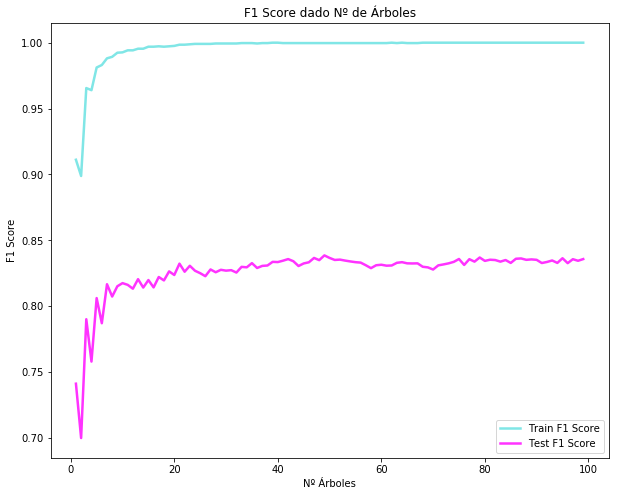

             precision    recall  f1-score   support

        0.0       0.93      0.91      0.92       985
        1.0       0.95      0.96      0.95      1639

avg / total       0.94      0.94      0.94      2624

             precision    recall  f1-score   support

        0.0       0.70      0.71      0.71       584
        1.0       0.84      0.83      0.83      1041

avg / total       0.79      0.79      0.79      1625



In [38]:
scoreTrain = []
scoreTest = []
for ne in range(1,100):
    model = RandomForestClassifier(n_estimators=ne, random_state=18, max_depth=20, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, 20, sTrain))
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,100)), np.array(scoreTrain), lw=2.5, color=(0.5,0.9,0.9), label='Train F1 Score')
plt.plot(np.array(range(1,100)), np.array(scoreTest), lw=2.5, color=(1,0.2,1), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=100, random_state=18, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

RF 99 1 0.772459
RF 99 2 0.809588
RF 99 3 0.815131
RF 99 4 0.822393
RF 99 5 0.842444
RF 99 6 0.856806
RF 99 7 0.884559
RF 99 8 0.901659
RF 99 9 0.923491
RF 99 10 0.945938
RF 99 11 0.964372
RF 99 12 0.975639
RF 99 13 0.987542
RF 99 14 0.991796
RF 99 15 0.991796
RF 99 16 0.994819
RF 99 17 0.996035
RF 99 18 0.995724
RF 99 19 0.997558
RF 99 20 0.996949
RF 99 21 0.997250
RF 99 22 0.997252
RF 99 23 0.997863
RF 99 24 0.997557
RF 99 25 0.997557
RF 99 26 0.997557
RF 99 27 0.997557
RF 99 28 0.997557
RF 99 29 0.997557
RF 99 30 0.997557
RF 99 31 0.997557
RF 99 32 0.997557
RF 99 33 0.997557
RF 99 34 0.997557
RF 99 35 0.997557
RF 99 36 0.997557
RF 99 37 0.997557
RF 99 38 0.997557
RF 99 39 0.997557
RF 99 40 0.997557
RF 99 41 0.997557
RF 99 42 0.997557
RF 99 43 0.997557
RF 99 44 0.997557
RF 99 45 0.997557
RF 99 46 0.997557
RF 99 47 0.997557
RF 99 48 0.997557
RF 99 49 0.997557
RF 99 50 0.997557
RF 99 51 0.997557
RF 99 52 0.997557
RF 99 53 0.997557
RF 99 54 0.997557
RF 99 55 0.997557
RF 99 56 0.997557
R

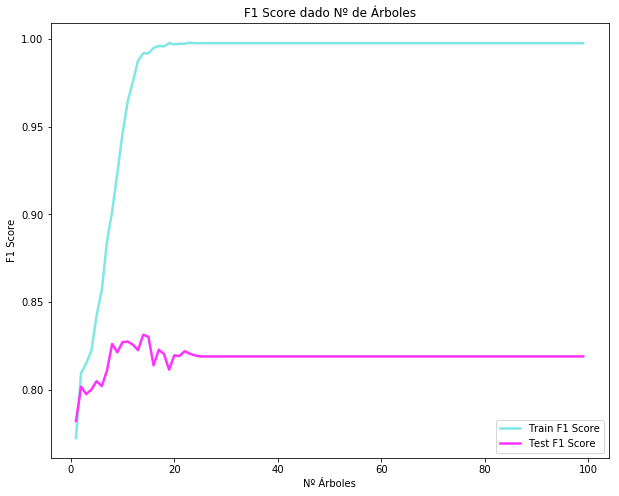

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       985
        1.0       1.00      1.00      1.00      1639

avg / total       1.00      1.00      1.00      2624

             precision    recall  f1-score   support

        0.0       0.67      0.72      0.69       584
        1.0       0.83      0.80      0.82      1041

avg / total       0.78      0.77      0.77      1625



In [39]:
scoreTrain = []
scoreTest = []
for md in range(1,100):
    model = RandomForestClassifier(n_estimators=18, random_state=18, max_depth=md, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, md, sTrain))
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,100)), np.array(scoreTrain), lw=2.5, color=(0.5,0.9,0.9), label='Train F1 Score')
plt.plot(np.array(range(1,100)), np.array(scoreTest), lw=2.5, color=(1,0.2,1), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=18, random_state=18, max_depth=100, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, bootstrap=False)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       985
        1.0       1.00      1.00      1.00      1639

avg / total       1.00      1.00      1.00      2624

             precision    recall  f1-score   support

        0.0       0.69      0.74      0.71       584
        1.0       0.85      0.81      0.83      1041

avg / total       0.79      0.79      0.79      1625



In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, max_features=1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       985
        1.0       1.00      1.00      1.00      1639

avg / total       1.00      1.00      1.00      2624

             precision    recall  f1-score   support

        0.0       0.72      0.73      0.73       584
        1.0       0.85      0.84      0.84      1041

avg / total       0.80      0.80      0.80      1625



In [42]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, min_samples_leaf=5)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.92      0.86      0.88       985
        1.0       0.92      0.95      0.93      1639

avg / total       0.92      0.92      0.92      2624

             precision    recall  f1-score   support

        0.0       0.71      0.69      0.70       584
        1.0       0.83      0.84      0.83      1041

avg / total       0.78      0.79      0.78      1625



#### Respuesta

En primera instancia, comparando los gráficos, se observa que el permitir mayor profundidad hace que el algoritmo converja de forma mas estable. De esta forma un resultado obtenido con un RandomForest de mayor profundidad da mas seguridad en sus resultados a futuro.

Por otro lado, el aumento en la cantidad de estimadores provocó que mejorara el algoritmo, de igual forma que aumentar la profundidad, sin embargo este crecimiento ocurre de forma mas inestable, dando a entender que la profundidad es un elemento vital en el comportamento del algoritmo.

El último experimento realizado, donde se pusieron ambos parámetros en 100, el máximo de los experimentos de aumento, muestra que el f1Score obtenido es exactamente igual a que si solo se aumenta la profundidad.

Dado todo lo anterior, en orden de importancia, el parámetro de profundidad tiene mas influencia que el parámetro de numero de estimadores ya que permite alcanzar el máximo potencial de la máquina.

Se realizó el experimento de eliminar bootstrasp y el f1Score empeoró, denotando lo diferenciador que es esta característica en el algorítmo.

Se observa que el parámetro max_features no influye. Sin embargo esto se puede deber a que la cantidad de atributos que describe el vino son pocos, tomando ya cada árbol un atributo.

El número mínimo de elemntos en las hojas tambien influye. Al aumentarlo mas de 3 se observa que empeora el f1Score. Esto se puede deber a que el algoritmo se va obligado a incluir elementos de la otra clase en la respuesta.

Respecto a la técnicas de boost, se mostró que los parámetros de máxima profundidad, la cantidad de arboles, tiene también una gran influencia en el conjunto de entrenamiento, pero no tanto así cuando se usa el conjunto de pruebas, por lo tanto, se concluye que este criterio no es aplicable a AdaBoost.

Finalmente, respecto a la variación entre los datos sin escalar y escalados, se observo un empeoramiento de los resultados. Comparando los boxplot realizados al proncipio, se observa que al escalar los datos aparecen muchísimos más outliers que hacen ruido a la hora de entrenar las máquinas. El que los resultados sean mejores con los datos no normalizados puede deberse a que los datos con un valor mayor justo tienen mayor influencia en el resultado, haciendo inperceptible la variación de los otros atributos.